In [4]:
from IPython.display import IFrame

# Skeletons and information to exercise sheet II

In [32]:
import json
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## a) Load the data

This is where the data will be loaded into the session.
Pandas has a lot of useful functions for that:

In [6]:
df = pd.read_json('sell-vs-not_balanced_train_data_handout.json',orient='records[4,5,6,7,8,9]')
#df_split = df.to_json(typ='frame')

df.columns[4:10]
sells = df.values[:,4]
number_of_ads = df.values[:,5]
linkration = df.values[:,6]
numberOfListItems = df.values[:,7]
FractionInput = df.values[:,8] 
input_ = df.values[:,9] 

new_def = df.values[:,4:9]
new_def

array([['mainly', 0, 0.1120954663, 104, 0.0032397408],
       ['mainly', 0, 0.11626830760000001, 109, 0.0032406157000000003],
       ['mainly', 0, 0.11417676360000001, 106, 0.0032670841],
       ...,
       ['not', 0, 0.0459284931, 50, 0.0018088634],
       ['not', 0, 0.0051274659, 8, 0.0050933786],
       ['not', 0, 0.027014026, 34, 0.00025926890000000003]], dtype=object)

Now we extract the features and target variable from the dataframe. 
The containing features are

 - 'number_of_ads', 
 - 'linkration', 
 - 'numberOfListItems', 
 - 'FractionInput', 
 - 'input'
 
and the target variable "sell". 

We consider the example as positive example if it falls into the category "mainly" and negative otherwise:

In [7]:
#for example, row in enumerate(new_def[:,0]):    
#    if example == 'mainly':
#        positive.append('positive', new_def[row,:])
#    else:
#        negative.append('negative', new_def[row,:])


## b) Feature scaling


The extracted features can vary vastly in range and distribution. This can be difficult for the algorithm to handle. We define a function that rescale the features into a common range.
The video below has some insights on that:

In [8]:
IFrame("https://www.youtube.com/embed/r5E2X1JdHAU", 640, 380)

In [15]:
def scaling_function(x: np.array) -> np.array:
    #maybe change array to float array
    max_1 = np.amax(x)
    for i in range(len(x)):
        x[i] = x[i] / max_1
    return x

## c) Implement an evaluation metric 
 
To keep track of the performance of our model, we need some kind of evaluation metric (for example accuracy or true missclassification error). During training we can check periodically, if the effectiveness of our model improves.

In [47]:
def evaluate(truth: np.array, prediction: np.array) -> float:
    if len(truth) == len(prediction):
        unequal=0
        for i in range(len(truth)):
            if truth[i] != prediction[i]:
                unequal += 1                
        mis_class_rate = unequal / len(truth)
        #print("misclassification rate is: ",mis_class_rate )
    #else:
        #print("Arrays are of length: ",len(truth)," and ",len(prediction),". They have to be the same size!")
    return mis_class_rate

test_array = np.array([1,2,3,4,5],dtype=np.float32)
test_array = scaling_function(test_array)
test_array

truth_array = ([1,1,1,1,1,1,1,1])
prediction_array = ([-1,-1,-1,-1,1,1,1,1])
error = evaluate(truth_array, prediction_array)

## c) Implement a   linear Classifier

Now we want to implement a classifier. The hypothesis for the linear model is:

$$ y(\mathbf{x}) = \mathbf{w}^T\mathbf{x} $$

This hypothesis' values range from $\text{-}\infty$ to $\infty$ (in theory). We predict a class by using the sign of the output.

$$ \tilde{y}(\mathbf{x}) = \operatorname{sgn}(y(\mathbf{x})) $$

Implementing the RSS cost function and the LMS algorithm for regression and estimation of weights.

misclassification rate is:  1.0
0.3739580161352932


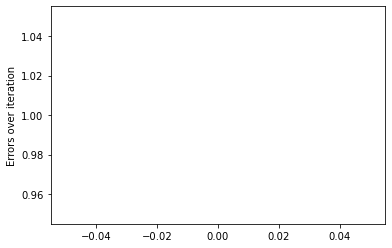

array([ 0.66931456,  0.59639059,  0.2144184 ,  0.37091808,  0.58667826,
       -0.16587044,  0.88250385,  1.61152107,  0.98095059])

In [38]:
def RSS(c,y) -> float:
    """Residual Sum of Squares"""
    result = 0
    for i in range(0,len(c)-1):
        result = pow(c[i]-y[i],2)
    return result

def LMS(x, c_x, learning_rate):
    """least mean square method"""
    #choose random pair from D
    w = np.random.rand(len(x))
    w_0 = 1 # random
    y = w
    errors = np.zeros(0)
    ctr = 0
    while True:
        ctr += 1
        rand_idx = random.randint(0,len(c_x)-1)
        for i in range(0,len(y)-1):
            y[i] = w[i]*x[i]
        delta = c_x[rand_idx] - y[rand_idx]
        delta_w = learning_rate * delta * x[rand_idx]
        w[rand_idx] = w[rand_idx] + delta_w
        if (RSS(c_x,y) <= 0.4):
            print(RSS(c_x,y))
            break
            #add w0 to front of array
        error = evaluate(c_x,y)#
        errors = np.append(errors,error)

    plt.plot(errors)
    plt.ylabel('Errors over iteration')
    plt.show()
    return w

x = np.array([1,-1,1,1,1,-1,1,-1,1])
cx = np.array([1,1,1,1,1,1,1,1,1])
weights = LMS(x,cx,1)
weights

## e) Logistic Regression

Now onto the more complex logistic regression.
The logistic regression's hypothesis is:
$$ \large y(\mathbf{x}) = \frac{1}{1+\exp(-\mathbf{w}^T\mathbf{x})}$$
This function has a range of values from 0 to 1 and can be interpreted as a probility of seeing the label $c(\mathbf{x})$ given the input $y(\mathbf{x})\hat{=} p(c(\mathbf{x})=1|\mathbf{x};w)$. 
Predictions can be made  by applying a threshold. For example if 
$$\tilde{y}(\mathbf{x}_i) = \begin{cases} 1 &\text{if } p(c(\mathbf{x}_i=1|\mathbf{x}_i;w) > 0.5\\ 0 & \text{otherwise} \end{cases}$$. 

This is analogous to the prediction method for the linear regression, which is basically the threshold 0.


Now keep in mind that the logistic regression is in fact very similar to the linear regression algorithm:

In [39]:
IFrame("https://webis.de/downloads/lecturenotes/machine-learning/unit-en-logistic-regression.pdf#algorithm-batch-gradient-descent-logistic-loss", 400, 300)

**Note**: One key difference is, since the logistic regression is meant to model a probability distribution the value range of the output is to be [0,1], and so the values of y have to be 0 and 1 (in contrast to the -1 and 1 of the linear regression above).

0.0006897334474813628


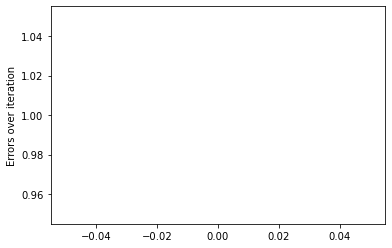

array([0.77502803, 0.40616183, 0.54887105, 0.63637462, 0.01790766,
       0.47110397, 0.0109221 , 1.02626278, 0.18141514])

In [48]:
def BGD(x, c_x, learning_rate):
    """least mean square method"""
    #choose random pair from D
    w = np.random.rand(len(x))
    w_0 = 1 # random
    t = 0
    y = w
    errors = np.zeros(0)
    while True:
        t += 1
        delta_w = 0
        for i in range(0,len(x)-1):
            y[i] = w[i]*x[i]
            delta = c_x[i] - y[i]
            delta_w = learning_rate * delta * x[i]
        w[i] = w[i] + delta_w
        if (RSS(c_x,y) <= 0.4 or t>100):
            print(RSS(c_x,y))
            break
            #add w0 to front of array
        error = evaluate(c_x,y)
        errors = np.append(errors,error)

    plt.plot(errors)
    plt.ylabel('Errors over iteration')
    plt.show()
    return w

x = np.array([1,-1,1,1,1,-1,1,-1,1])
cx = np.array([1,1,1,1,1,1,1,1,1])
weights = BGD(x,cx,1)
weights

## f) Evaluation

To find out which of the models is better suited to fit the data and especially to predict on new and unseen data, we have to make a somewhat fair comparison.

Consider n-fold cross validation: For that we split our data into 5 batches, then estimate our parameters on 4 of the splits and testing on the one left out. We repeat this process for every split and estimate average performance.

We provide you with a batching function: 

In [ ]:
def return_batch_indices(n, k=5):
    """This function takes a range n and a number of splits k and returns k arrays of n/k integers. 
    You can use these to index an array with n elements."""
    assert k < n, "Fewer samples than splits is not allowed"
    indices = np.array(range(n))
    np.random.shuffle(indices)
    return np.array_split(indices, k)

useful for extracting the same rows out of multiple arrays:
```python
indices = return_batch_indices(x.shape[0], 5)
x[indices[0]], y[indices[0]]
```
will extract the same rows from x and y.

Using this we can implement a crossvalidation function and evaluate our algorithms:

# Bonus 

Predicting on the test data set by applying what we have learned. Chose a hypothesis, estimate the weights and make predictions on the test set:

Write the data to file

In [ ]:
test_data.to_json("test_data_prediction_XXX.json")